<>:7: SyntaxWarning: invalid escape sequence '\o'
<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\o'
<>:8: SyntaxWarning: invalid escape sequence '\c'
/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_90339/2201215856.py:7: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel("$\overline{\sigma}_e$ [cm$^2$]")
/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_90339/2201215856.py:8: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel("$m_\chi$ [MeV]")


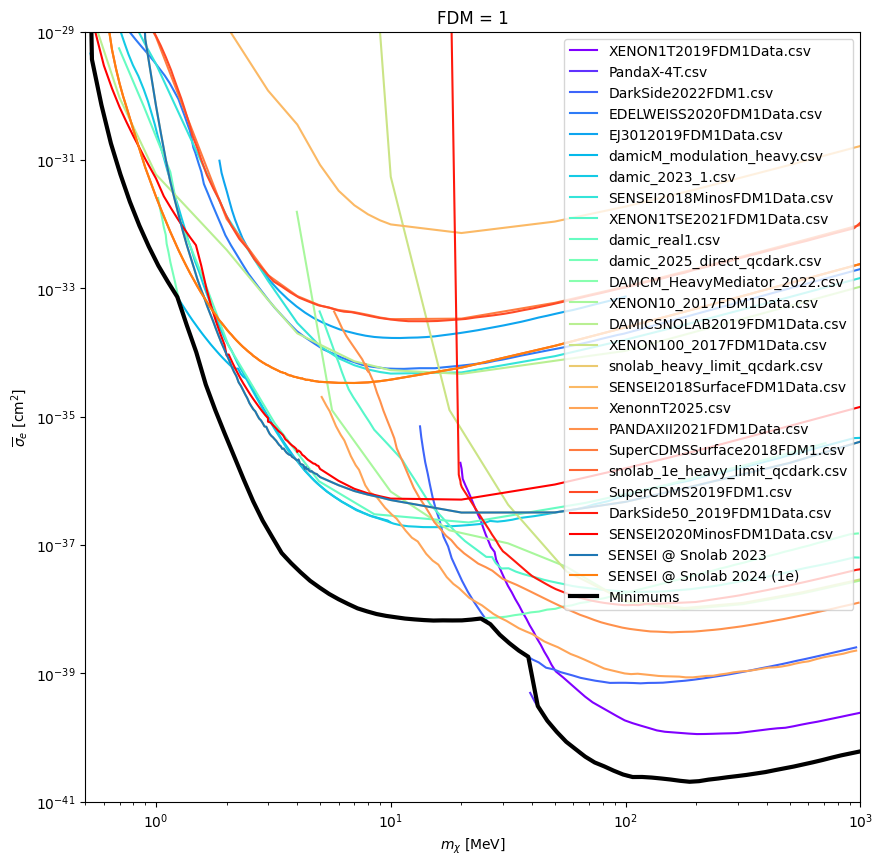

FILES USED TO GENERATE MINIMUMS
['1.0' 'DarkSide2022FDM1.csv' 'PandaX-4T.csv'
 'damicM_modulation_heavy.csv' 'damic_2025_direct_qcdark.csv'
 'snolab_1e_heavy_limit_qcdark.csv']


In [1]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from matplotlib.pyplot import cm
import numpy as np
plt.figure(figsize=(10,10))
plt.title("FDM = 1")
plt.ylabel("$\overline{\sigma}_e$ [cm$^2$]")
plt.xlabel("$m_\chi$ [MeV]")
plt.yscale('log')
plt.xscale('log')
import os

fdm1dir = './DM-e-FDM1/'

flist = os.listdir(fdm1dir)

color = cm.rainbow(np.linspace(0, 1, len(flist)))

used_file_list = []



full_mass_grid = np.geomspace(0.1,1000,100)
final_limit_grid = np.ones_like(full_mass_grid)
file_list_grid = list(np.ones_like(full_mass_grid))

for h,hlimfile in enumerate(flist):
    if 'csv' not in hlimfile or 'Solar' in hlimfile:
        continue
    if 'xenon_heavy_constraints' in hlimfile:
        continue
    if '_fixed' in hlimfile:
        continue
    if 'recast' in hlimfile:
        continue
    hlimdata = np.loadtxt(fdm1dir + hlimfile,delimiter=',')
    if hlimdata.shape[1] == 3:
        index1 = 1
        index2 = 2
    else:
        index1 = 0
        index2 = 1

    lim_function = interp1d(hlimdata[:,index1], hlimdata[:,index2], kind='linear', axis=-1, copy=True, bounds_error=False, fill_value=np.nan, assume_sorted=False)
    for i,mX in enumerate(full_mass_grid):
        if np.isnan(lim_function(mX)):
            continue
        if lim_function(mX) < final_limit_grid[i]:
            final_limit_grid[i] = lim_function(mX)
            file_list_grid[i] = hlimfile
    
    
    plt.plot(hlimdata[:,0],hlimdata[:,1],label=hlimfile,color=color[h])


# xenon_1t_2019_fixed = np.loadtxt('/Users/ansh/Local/SENSEI/sensei_toy_limit/limits/other_experiments/DM-e-FDM1/XENON1T2019FDM1Data_fixed.csv',delimiter=',')
# plt.plot(xenon_1t_2019_fixed[:,0],xenon_1t_2019_fixed[:,1],label='Xenon 1T 2019 Fixed')

# xenon_1t_2019 = np.loadtxt('/Users/ansh/Local/SENSEI/sensei_toy_limit/limits/other_experiments/DM-e-FDM1/XENON1T2019FDM1Data.csv',delimiter=',')
# plt.plot(xenon_1t_2019[:,0],xenon_1t_2019[:,1],label='Xenon 1T 2019')


# xenon1tse2021 = np.loadtxt('/Users/ansh/Local/SENSEI/sensei_toy_limit/limits/other_experiments/DM-e-FDM1/XENON1TSE2021FDM1Data.csv',delimiter=',')
# plt.plot(xenon1tse2021[:,0],xenon1tse2021[:,1],label='Xenon 1T se 2021')


# xenon10_2017 = np.loadtxt('/Users/ansh/Local/SENSEI/sensei_toy_limit/limits/other_experiments/DM-e-FDM1/XENON10_2017FDM1Data.csv',delimiter=',')
# plt.plot(xenon10_2017[:,0],xenon10_2017[:,1],label='Xenon 10 2017')

# xenon100_2017 = np.loadtxt('/Users/ansh/Local/SENSEI/sensei_toy_limit/limits/other_experiments/DM-e-FDM1/XENON100_2017FDM1Data.csv',delimiter=',')
# plt.plot(xenon100_2017[:,0],xenon100_2017[:,1],label='Xenon 100 2017')

# darkside2022 = np.loadtxt('/Users/ansh/Local/SENSEI/sensei_toy_limit/limits/other_experiments/DM-e-FDM1/DarkSide2022FDM1.csv',delimiter=',')
# plt.plot(darkside2022[:,0],darkside2022[:,1],label='Darkside 2022')

# darkside50_2019 = np.loadtxt('/Users/ansh/Local/SENSEI/sensei_toy_limit/limits/other_experiments/DM-e-FDM1/DarkSide50_2019FDM1Data.csv',delimiter=',')
# plt.plot(darkside50_2019[:,0],darkside50_2019[:,1],label='Darkside 50 2019')


senseisnolab = np.loadtxt('./DM-e-FDM1/snolab_heavy_limit_qcdark.csv',delimiter=',')
plt.plot(senseisnolab[:,0],senseisnolab[:,1],label='SENSEI @ Snolab 2023')

lim_function = interp1d(senseisnolab[:,0], senseisnolab[:,1], kind='linear', axis=-1, copy=True, bounds_error=False, fill_value=np.nan, assume_sorted=False)
for i,mX in enumerate(full_mass_grid):
    if np.isnan(lim_function(mX)):
        continue
    if lim_function(mX) < final_limit_grid[i]:
        final_limit_grid[i] = lim_function(mX)
        file_list_grid[i] = 'sensei snolab'

senseisnolab1e = np.loadtxt('./DM-e-FDM1/snolab_1e_heavy_limit_qcdark.csv',delimiter=',')
plt.plot(senseisnolab1e[:,0],senseisnolab1e[:,1],label='SENSEI @ Snolab 2024 (1e)')

lim_function = interp1d(senseisnolab1e[:,0], senseisnolab1e[:,1], kind='linear', axis=-1, copy=True, bounds_error=False, fill_value=np.nan, assume_sorted=False)
for i,mX in enumerate(full_mass_grid):
    if np.isnan(lim_function(mX)):
        continue
    if  (mX) < final_limit_grid[i]:
        final_limit_grid[i] = lim_function(mX)
        file_list_grid[i] = 'sensei snolab 1e'



plt.plot(full_mass_grid,final_limit_grid,lw=3,color='black',label='Minimums')
plt.ylim(1e-41,1e-29)

plt.xlim(0.5,1000)
plt.legend()
plt.show()
plt.close()
print("FILES USED TO GENERATE MINIMUMS")
print(np.unique(file_list_grid))


final_heavy_limits = np.vstack((full_mass_grid,final_limit_grid))
np.savetxt("./current_constraints_fdm1.csv",final_heavy_limits,delimiter=',')


<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\c'
/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_90339/1096810789.py:5: SyntaxWarning: invalid escape sequence '\p'
  plt.title("FDM $\propto 1/q^2$")
/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_90339/1096810789.py:6: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel("$\overline{\sigma}_e$ [cm$^2$]")
/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_90339/1096810789.py:7: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel("$m_\chi$ [MeV]")


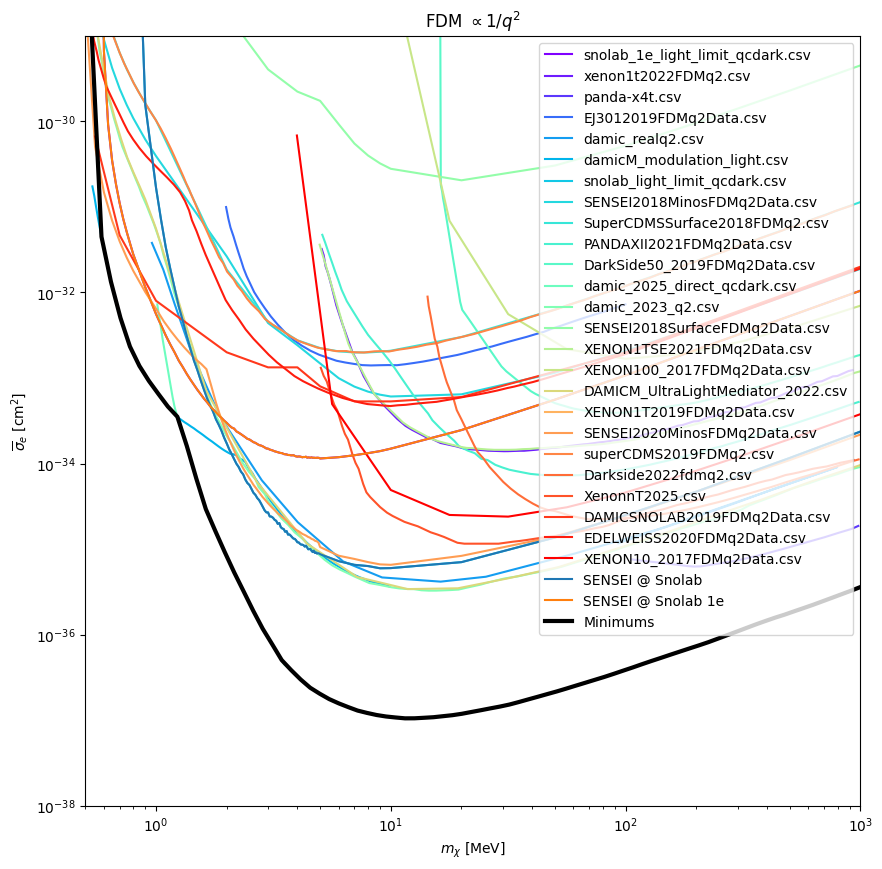

FILES USED TO GENERATE MINIMUMS
['1.0' 'SENSEI2020MinosFDMq2Data.csv' 'damicM_modulation_light.csv'
 'damic_2025_direct_qcdark.csv' 'snolab_1e_light_limit_qcdark.csv']


In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
plt.figure(figsize=(10,10))
plt.title("FDM $\propto 1/q^2$")
plt.ylabel("$\overline{\sigma}_e$ [cm$^2$]")
plt.xlabel("$m_\chi$ [MeV]")
plt.yscale('log')
plt.xscale('log')
import os

fdmq2dir = './DM-e-FDMq2/'

flist = os.listdir(fdmq2dir)

color = cm.rainbow(np.linspace(0, 1, len(flist)))


used_file_list = []



full_mass_grid = np.geomspace(0.1,1000,100)
final_limit_grid = np.ones_like(full_mass_grid)
file_list_grid = list(np.ones_like(full_mass_grid))

for i,hlimfile in enumerate(flist):
    if 'csv' not in hlimfile or 'Solar' in hlimfile:
        continue
    if 'xenon_light_constraints' in hlimfile:
        continue
    if '_fixed' in hlimfile:
        continue
    if 'recast' in hlimfile:
        continue
    
    hlimdata = np.loadtxt(fdmq2dir + hlimfile,delimiter=',')
    if hlimdata.shape[1] == 3:
        index1 = 1
        index2 = 2
    else:
        index1 = 0
        index2 = 1
    
    plt.plot(hlimdata[:,index1],hlimdata[:,index2],label=hlimfile,color=color[i])

    lim_function = interp1d(hlimdata[:,index1], hlimdata[:,index2], kind='linear', axis=-1, copy=True, bounds_error=False, fill_value=np.nan, assume_sorted=False)
    for i,mX in enumerate(full_mass_grid):
        if np.isnan(lim_function(mX)):
            continue
        if lim_function(mX) < final_limit_grid[i]:
            final_limit_grid[i] = lim_function(mX)
            file_list_grid[i] = hlimfile
            


# xenon_1t_2019_fixed = np.loadtxt('/Users/ansh/Local/SENSEI/sensei_toy_limit/limits/other_experiments/DM-e-FDM1/XENON1T2019FDM1Data_fixed.csv',delimiter=',')
# plt.plot(xenon_1t_2019_fixed[:,0],xenon_1t_2019_fixed[:,1],label='Xenon 1T 2019 Fixed')

# xenon_1t_2019 = np.loadtxt('/Users/ansh/Local/SENSEI/sensei_toy_limit/limits/other_experiments/DM-e-FDM1/XENON1T2019FDM1Data.csv',delimiter=',')
# plt.plot(xenon_1t_2019[:,0],xenon_1t_2019[:,1],label='Xenon 1T 2019')


# xenon1tse2021 = np.loadtxt('/Users/ansh/Local/SENSEI/sensei_toy_limit/limits/other_experiments/DM-e-FDM1/XENON1TSE2021FDM1Data.csv',delimiter=',')
# plt.plot(xenon1tse2021[:,0],xenon1tse2021[:,1],label='Xenon 1T se 2021')


# xenon10_2017 = np.loadtxt('/Users/ansh/Local/SENSEI/sensei_toy_limit/limits/other_experiments/DM-e-FDM1/XENON10_2017FDM1Data.csv',delimiter=',')
# plt.plot(xenon10_2017[:,0],xenon10_2017[:,1],label='Xenon 10 2017')

# xenon100_2017 = np.loadtxt('/Users/ansh/Local/SENSEI/sensei_toy_limit/limits/other_experiments/DM-e-FDM1/XENON100_2017FDM1Data.csv',delimiter=',')
# plt.plot(xenon100_2017[:,0],xenon100_2017[:,1],label='Xenon 100 2017')

# darkside2022 = np.loadtxt('/Users/ansh/Local/SENSEI/sensei_toy_limit/limits/other_experiments/DM-e-FDM1/DarkSide2022FDM1.csv',delimiter=',')
# plt.plot(darkside2022[:,0],darkside2022[:,1],label='Darkside 2022')

# darkside50_2019 = np.loadtxt('/Users/ansh/Local/SENSEI/sensei_toy_limit/limits/other_experiments/DM-e-FDM1/DarkSide50_2019FDM1Data.csv',delimiter=',')
# plt.plot(darkside50_2019[:,0],darkside50_2019[:,1],label='Darkside 50 2019')


senseisnolab = np.loadtxt('./DM-e-FDMq2/snolab_light_limit_qcdark.csv',delimiter=',')
plt.plot(senseisnolab[:,0],senseisnolab[:,1],label='SENSEI @ Snolab')

lim_function = interp1d(senseisnolab[:,0], senseisnolab[:,1], kind='linear', axis=-1, copy=True, bounds_error=False, fill_value=np.nan, assume_sorted=False)
for i,mX in enumerate(full_mass_grid):
    if np.isnan(lim_function(mX)):
        continue
    if lim_function(mX) < final_limit_grid[i]:
        final_limit_grid[i] = lim_function(mX)
        file_list_grid[i] = 'sensei snolab'





senseisnolab1e = np.loadtxt('./DM-e-FDMq2/snolab_1e_light_limit_qcdark.csv',delimiter=',')
plt.plot(senseisnolab1e[:,0],senseisnolab1e[:,1],label='SENSEI @ Snolab 1e')

lim_function = interp1d(senseisnolab1e[:,0], senseisnolab1e[:,1], kind='linear', axis=-1, copy=True, bounds_error=False, fill_value=np.nan, assume_sorted=False)
for i,mX in enumerate(full_mass_grid):
    if np.isnan(lim_function(mX)):
        continue
    if lim_function(mX) < final_limit_grid[i]:
        final_limit_grid[i] = lim_function(mX)
        file_list_grid[i] = 'sensei snolab 1e'

plt.plot(full_mass_grid,final_limit_grid,lw=3,color='black',label='Minimums')

plt.ylim(1e-38,1e-29)

plt.xlim(0.5,1000)
plt.legend()
plt.show()
plt.close()
print("FILES USED TO GENERATE MINIMUMS")
print(np.unique(file_list_grid))


final_light_limits = np.vstack((full_mass_grid,final_limit_grid))
np.savetxt("./current_constraints_fdmq2.csv",final_light_limits,delimiter=',')



In [3]:
# SOLAR

<>:7: SyntaxWarning: invalid escape sequence '\o'
<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\o'
<>:8: SyntaxWarning: invalid escape sequence '\c'
/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_90339/4006736333.py:7: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel("$\overline{\sigma}_e$ [cm$^2$]")
/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_90339/4006736333.py:8: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel("$m_\chi$ [MeV]")


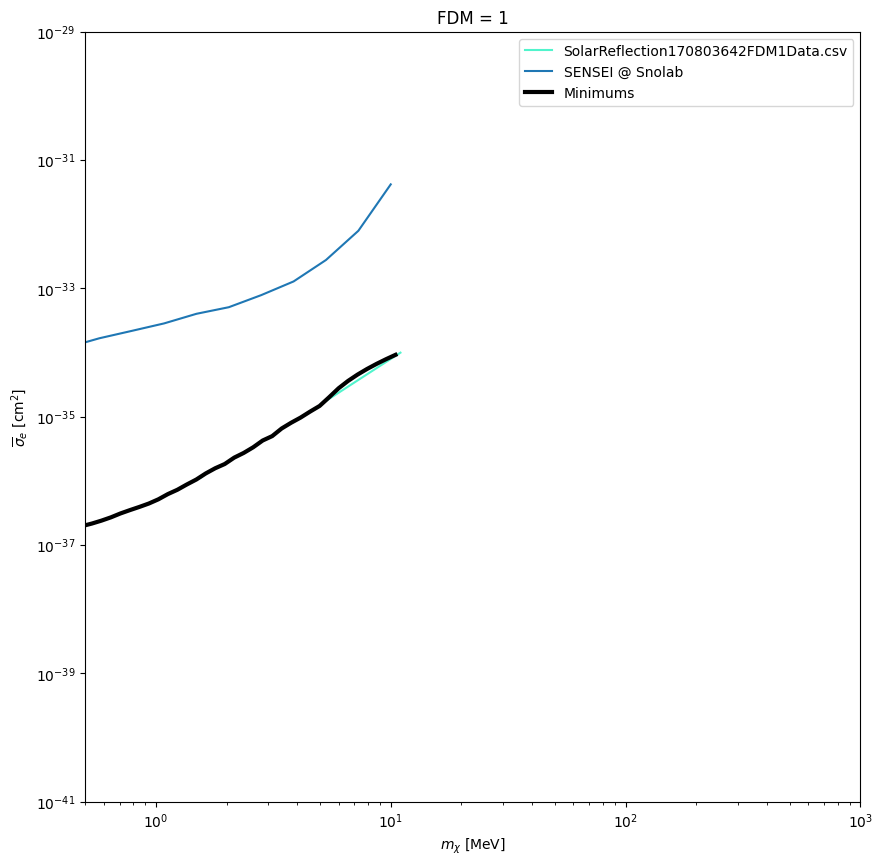

FILES USED TO GENERATE MINIMUMS
['1.0' 'SolarReflection170803642FDM1Data.csv']


In [3]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from matplotlib.pyplot import cm
import numpy as np
plt.figure(figsize=(10,10))
plt.title("FDM = 1")
plt.ylabel("$\overline{\sigma}_e$ [cm$^2$]")
plt.xlabel("$m_\chi$ [MeV]")
plt.yscale('log')
plt.xscale('log')
import os

fdm1dir = './DM-e-FDM1/'

flist = os.listdir(fdm1dir)

color = cm.rainbow(np.linspace(0, 1, len(flist)))

used_file_list = []



full_mass_grid = np.geomspace(0.1,1000,100)
final_limit_grid = np.ones_like(full_mass_grid)
file_list_grid = list(np.ones_like(full_mass_grid))

for h,hlimfile in enumerate(flist):
    if 'csv' not in hlimfile or 'Solar' not in hlimfile:
        continue
    if 'xenon_heavy_constraints' in hlimfile:
        continue
    if '_fixed' in hlimfile:
        continue
    if 'recast' in hlimfile:
        continue
    hlimdata = np.loadtxt(fdm1dir + hlimfile,delimiter=',')
    if hlimdata.shape[1] == 3:
        index1 = 1
        index2 = 2
    else:
        index1 = 0
        index2 = 1

    lim_function = interp1d(hlimdata[:,index1], hlimdata[:,index2], kind='linear', axis=-1, copy=True, bounds_error=False, fill_value=np.nan, assume_sorted=False)
    for i,mX in enumerate(full_mass_grid):
        if np.isnan(lim_function(mX)):
            continue
        if lim_function(mX) < final_limit_grid[i]:
            final_limit_grid[i] = lim_function(mX)
            file_list_grid[i] = hlimfile
    
    
    plt.plot(hlimdata[:,0],hlimdata[:,1],label=hlimfile,color=color[h])


# xenon_1t_2019_fixed = np.loadtxt('/Users/ansh/Local/SENSEI/sensei_toy_limit/limits/other_experiments/DM-e-FDM1/XENON1T2019FDM1Data_fixed.csv',delimiter=',')
# plt.plot(xenon_1t_2019_fixed[:,0],xenon_1t_2019_fixed[:,1],label='Xenon 1T 2019 Fixed')

# xenon_1t_2019 = np.loadtxt('/Users/ansh/Local/SENSEI/sensei_toy_limit/limits/other_experiments/DM-e-FDM1/XENON1T2019FDM1Data.csv',delimiter=',')
# plt.plot(xenon_1t_2019[:,0],xenon_1t_2019[:,1],label='Xenon 1T 2019')


# xenon1tse2021 = np.loadtxt('/Users/ansh/Local/SENSEI/sensei_toy_limit/limits/other_experiments/DM-e-FDM1/XENON1TSE2021FDM1Data.csv',delimiter=',')
# plt.plot(xenon1tse2021[:,0],xenon1tse2021[:,1],label='Xenon 1T se 2021')


# xenon10_2017 = np.loadtxt('/Users/ansh/Local/SENSEI/sensei_toy_limit/limits/other_experiments/DM-e-FDM1/XENON10_2017FDM1Data.csv',delimiter=',')
# plt.plot(xenon10_2017[:,0],xenon10_2017[:,1],label='Xenon 10 2017')

# xenon100_2017 = np.loadtxt('/Users/ansh/Local/SENSEI/sensei_toy_limit/limits/other_experiments/DM-e-FDM1/XENON100_2017FDM1Data.csv',delimiter=',')
# plt.plot(xenon100_2017[:,0],xenon100_2017[:,1],label='Xenon 100 2017')

# darkside2022 = np.loadtxt('/Users/ansh/Local/SENSEI/sensei_toy_limit/limits/other_experiments/DM-e-FDM1/DarkSide2022FDM1.csv',delimiter=',')
# plt.plot(darkside2022[:,0],darkside2022[:,1],label='Darkside 2022')

# darkside50_2019 = np.loadtxt('/Users/ansh/Local/SENSEI/sensei_toy_limit/limits/other_experiments/DM-e-FDM1/DarkSide50_2019FDM1Data.csv',delimiter=',')
# plt.plot(darkside50_2019[:,0],darkside50_2019[:,1],label='Darkside 50 2019')


senseisnolab = np.loadtxt('./DM-e-FDM1/blinded_heavy_mediator_srdm_good_channelized_interpolated_snolabrun1.csv',delimiter=',')
plt.plot(senseisnolab[:,0],senseisnolab[:,1],label='SENSEI @ Snolab')

lim_function = interp1d(senseisnolab[:,0], senseisnolab[:,1], kind='linear', axis=-1, copy=True, bounds_error=False, fill_value=np.nan, assume_sorted=False)
for i,mX in enumerate(full_mass_grid):
    if np.isnan(lim_function(mX)):
        continue
    if lim_function(mX) < final_limit_grid[i]:
        final_limit_grid[i] = lim_function(mX)
        file_list_grid[i] = 'sensei snolab solar'


indices = np.where(final_limit_grid < 1)
full_mass_grid = full_mass_grid[indices]
final_limit_grid = final_limit_grid[indices]
plt.plot(full_mass_grid,final_limit_grid,lw=3,color='black',label='Minimums')
plt.ylim(1e-41,1e-29)

plt.xlim(0.5,1000)
plt.legend()
plt.show()
plt.close()
print("FILES USED TO GENERATE MINIMUMS")
print(np.unique(file_list_grid))


final_heavy_limits = np.vstack((full_mass_grid,final_limit_grid))
np.savetxt("./solar_current_constraints_fdm1.csv",final_heavy_limits,delimiter=',')


<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\c'
/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_90339/196392163.py:5: SyntaxWarning: invalid escape sequence '\p'
  plt.title("FDM $\propto 1/q^2$")
/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_90339/196392163.py:6: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel("$\overline{\sigma}_e$ [cm$^2$]")
/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_90339/196392163.py:7: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel("$m_\chi$ [MeV]")


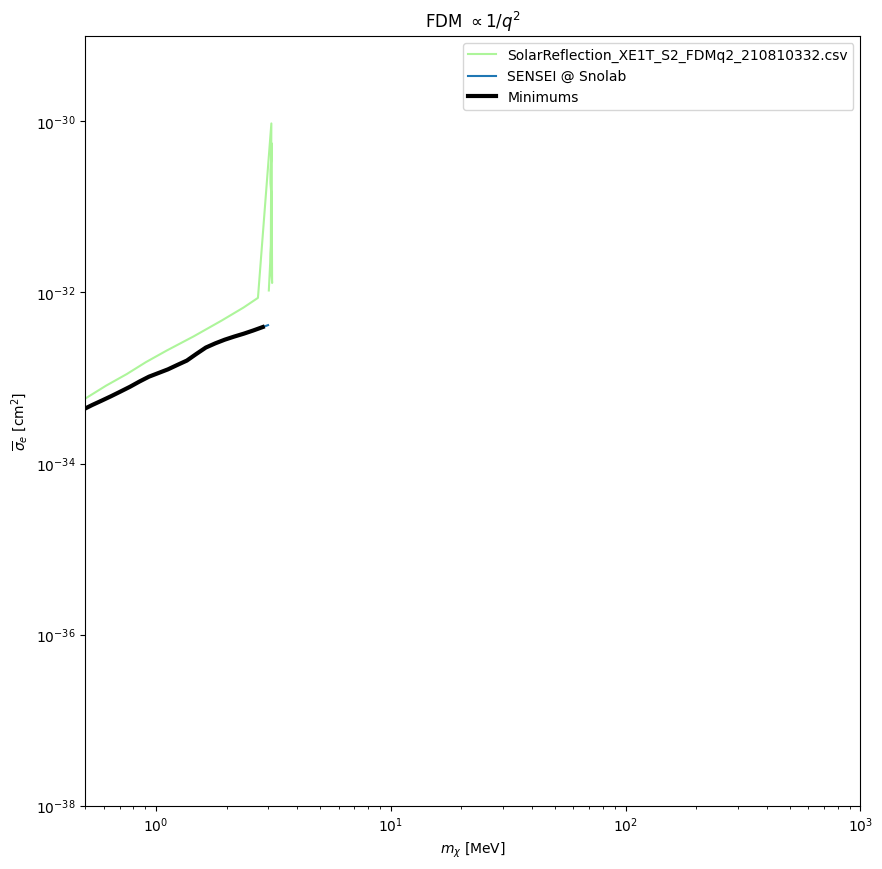

FILES USED TO GENERATE MINIMUMS
['1.0' 'sensei snolab']


In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
plt.figure(figsize=(10,10))
plt.title("FDM $\propto 1/q^2$")
plt.ylabel("$\overline{\sigma}_e$ [cm$^2$]")
plt.xlabel("$m_\chi$ [MeV]")
plt.yscale('log')
plt.xscale('log')
import os

fdmq2dir = './DM-e-FDMq2/'

flist = os.listdir(fdmq2dir)

color = cm.rainbow(np.linspace(0, 1, len(flist)))


used_file_list = []



full_mass_grid = np.geomspace(0.1,1000,100)
final_limit_grid = np.ones_like(full_mass_grid)
file_list_grid = list(np.ones_like(full_mass_grid))

for i,hlimfile in enumerate(flist):
    if 'csv' not in hlimfile or 'Solar' not in hlimfile:
        continue
    if 'xenon_light_constraints' in hlimfile:
        continue
    if '_fixed' in hlimfile:
        continue
    if 'recast' in hlimfile:
        continue
    
    hlimdata = np.loadtxt(fdmq2dir + hlimfile,delimiter=',')
    if hlimdata.shape[1] == 3:
        index1 = 1
        index2 = 2
    else:
        index1 = 0
        index2 = 1
    
    plt.plot(hlimdata[:,index1],hlimdata[:,index2],label=hlimfile,color=color[i])

    lim_function = interp1d(hlimdata[:,index1], hlimdata[:,index2], kind='linear', axis=-1, copy=True, bounds_error=False, fill_value=np.nan, assume_sorted=False)
    for i,mX in enumerate(full_mass_grid):
        if np.isnan(lim_function(mX)):
            continue
        if lim_function(mX) < final_limit_grid[i]:
            final_limit_grid[i] = lim_function(mX)
            file_list_grid[i] = hlimfile
            


# xenon_1t_2019_fixed = np.loadtxt('/Users/ansh/Local/SENSEI/sensei_toy_limit/limits/other_experiments/DM-e-FDM1/XENON1T2019FDM1Data_fixed.csv',delimiter=',')
# plt.plot(xenon_1t_2019_fixed[:,0],xenon_1t_2019_fixed[:,1],label='Xenon 1T 2019 Fixed')

# xenon_1t_2019 = np.loadtxt('/Users/ansh/Local/SENSEI/sensei_toy_limit/limits/other_experiments/DM-e-FDM1/XENON1T2019FDM1Data.csv',delimiter=',')
# plt.plot(xenon_1t_2019[:,0],xenon_1t_2019[:,1],label='Xenon 1T 2019')


# xenon1tse2021 = np.loadtxt('/Users/ansh/Local/SENSEI/sensei_toy_limit/limits/other_experiments/DM-e-FDM1/XENON1TSE2021FDM1Data.csv',delimiter=',')
# plt.plot(xenon1tse2021[:,0],xenon1tse2021[:,1],label='Xenon 1T se 2021')


# xenon10_2017 = np.loadtxt('/Users/ansh/Local/SENSEI/sensei_toy_limit/limits/other_experiments/DM-e-FDM1/XENON10_2017FDM1Data.csv',delimiter=',')
# plt.plot(xenon10_2017[:,0],xenon10_2017[:,1],label='Xenon 10 2017')

# xenon100_2017 = np.loadtxt('/Users/ansh/Local/SENSEI/sensei_toy_limit/limits/other_experiments/DM-e-FDM1/XENON100_2017FDM1Data.csv',delimiter=',')
# plt.plot(xenon100_2017[:,0],xenon100_2017[:,1],label='Xenon 100 2017')

# darkside2022 = np.loadtxt('/Users/ansh/Local/SENSEI/sensei_toy_limit/limits/other_experiments/DM-e-FDM1/DarkSide2022FDM1.csv',delimiter=',')
# plt.plot(darkside2022[:,0],darkside2022[:,1],label='Darkside 2022')

# darkside50_2019 = np.loadtxt('/Users/ansh/Local/SENSEI/sensei_toy_limit/limits/other_experiments/DM-e-FDM1/DarkSide50_2019FDM1Data.csv',delimiter=',')
# plt.plot(darkside50_2019[:,0],darkside50_2019[:,1],label='Darkside 50 2019')


senseisnolab = np.loadtxt('./DM-e-FDMq2/blinded_light_mediator_srdm_good_channelized_interpolated_snolabrun1.csv',delimiter=',')
plt.plot(senseisnolab[:,0],senseisnolab[:,1],label='SENSEI @ Snolab')

lim_function = interp1d(senseisnolab[:,0], senseisnolab[:,1], kind='linear', axis=-1, copy=True, bounds_error=False, fill_value=np.nan, assume_sorted=False)
for i,mX in enumerate(full_mass_grid):
    if np.isnan(lim_function(mX)):
        continue
    if lim_function(mX) < final_limit_grid[i]:
        final_limit_grid[i] = lim_function(mX)
        file_list_grid[i] = 'sensei snolab'





indices = np.where(final_limit_grid < 1)
full_mass_grid = full_mass_grid[indices]
final_limit_grid = final_limit_grid[indices]
plt.plot(full_mass_grid,final_limit_grid,lw=3,color='black',label='Minimums')

plt.ylim(1e-38,1e-29)

plt.xlim(0.5,1000)
plt.legend()
plt.show()
plt.close()
print("FILES USED TO GENERATE MINIMUMS")
print(np.unique(file_list_grid))


final_heavy_limits = np.vstack((full_mass_grid,final_limit_grid))
np.savetxt("./solar_current_constraints_fdmq2.csv",final_heavy_limits,delimiter=',')

